# Practice 3. Robust Linear Regression

Authors: Marc Ballestero and Iris Vukovic

# 1.  Introduction

Use gradient descent method to find optimal values of $w_0$ and $w_1$ that will minimize the least squares error function: \\
$$Q = \frac{1}{2} \sum_{i=1}^me_i^2=\frac{1}{2} \sum_{i=1}^m(\hat{y}-y)^2=\frac{1}{2} \sum_{i=1}^m(w_0x+w_1-y)^2$$

#### (1) Compute the parameters.

In [ ]:
import numpy as np
import math
from math import floor, ceil

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from cycler import cycler


import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [ ]:
def backtracking_gradient_descent(x0: np.ndarray, f, grad_f, alpha_0=1, z_tol=1.e-5) -> np.ndarray:
  """
  This function performs gradient descent from x0 adapting the step size
  at each iteration using backtracking. It returns a list of all the points
  visited by the descent algorithm.
  """
  x = x0
  path = np.array([x])

  converged = False
  while not converged:
    alpha = alpha_0

    while f(x - alpha * grad_f(x)) >= f(x):
      alpha /= 2


    x = x - alpha*grad_f(x)
    #print(x)
    path = np.vstack([path, x]) #a matrix where each row represents a point along the path
    #print(path)

    gradient_norm = np.linalg.norm(grad_f(x))
    converged = gradient_norm < z_tol
    #print(f"x: {x}, alpha: {alpha}, gradient: {grad_f(x)}, gradient norm: {gradient_norm}")

  return np.array(x), path


In [ ]:
def Q(w):
  return 0.5 * np.sum((w[0] * x + w[1] -y) **2)

def grad_Q(w):
  return np.array([np.sum((w[0]*x+w[1]-y)*x),np.sum(w[0]*x+w[1]-y)])


In [ ]:
#normal distribution
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]]) #variance along x_axis is 100, along y-axis is 1
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100) #data points


In [ ]:
x = points[:, 0]
y = points[:, 1]

#w = np.random.rand(2) #initial guess
w = np.array([1,1])

w, path = backtracking_gradient_descent(w, f=Q, grad_f=grad_Q)
print(w)


[0.98024581 0.06261688]


#### Graph the line obtained.

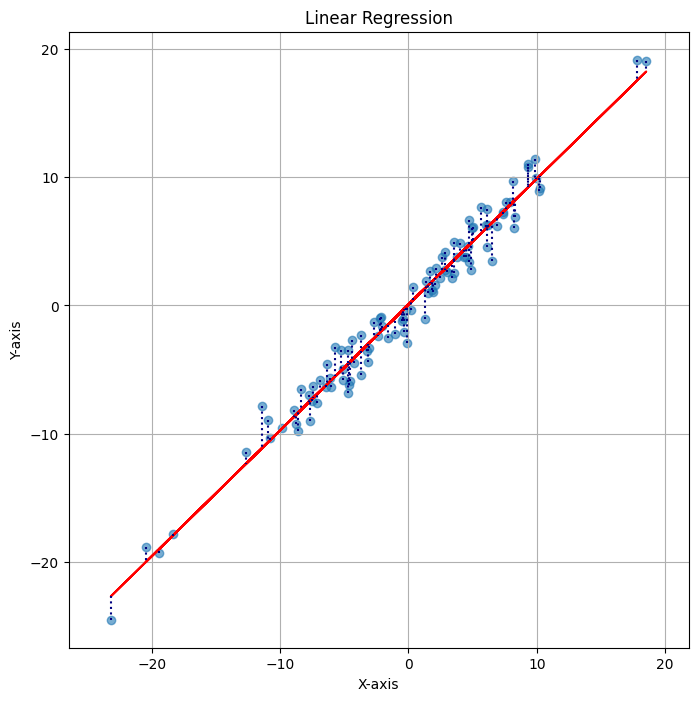

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.6)
yhat = w[0] * x + w[1] #fitted value with optimal parameters
plt.plot(x, yhat, color='red')
plt.axis('equal')

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], yhat[i]], color='navy', linestyle='dotted')

# Add titles and labels
plt.title('Linear Regression')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')


# Show the plot
plt.grid()
plt.show()


Fits pretty well.

#### (2) Check sensitivity to outliers.

In [ ]:
def backtracking_gradient_descent(x0: np.ndarray, f, grad_f, alpha_0=1, z_tol=1.e-5) -> np.ndarray:
  """
  This function performs gradient descent from x0 adapting the step size
  at each iteration using backtracking. It returns a list of all the points
  visited by the descent algorithm.
  """
  x = x0
  path = np.array([x])

  converged = False
  iteration = 0

  while not converged and iteration < 1000:
    alpha = alpha_0

    while f(x - alpha * grad_f(x)) >= f(x):
      alpha /= 2
      if alpha < 1e-10: #if step size is too small, parameters aren't changing much and algorithm stalls
                print("alpha too small, stopping.")
                return x, path


    x = x - alpha*grad_f(x)
    #print(x)
    path = np.vstack([path, x]) #a matrix where each row represents a point along the path
    #print(path)

    gradient_norm = np.linalg.norm(grad_f(x))
    converged = gradient_norm < z_tol
    #print(f"x: {x}, alpha: {alpha}, gradient: {grad_f(x)}, gradient norm: {gradient_norm}")

    iteration+=0

    if iteration >= 1000:
        print("maximum iterations reached without convergence.")
  return np.array(x), path


In [ ]:
#normal distribution with outlier
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]]) #variance along x_axis is 100, along y-axis is 1
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100) #data points
points[1] = [-40,20]


In [ ]:
x = points[:, 0]
y = points[:, 1]

#w = np.random.rand(2) #initial guess
w = np.array([1,1])

w, path = backtracking_gradient_descent(w, f=Q, grad_f=grad_Q)
print(w)


alpha too small, stopping.
[0.62886841 0.71797602]


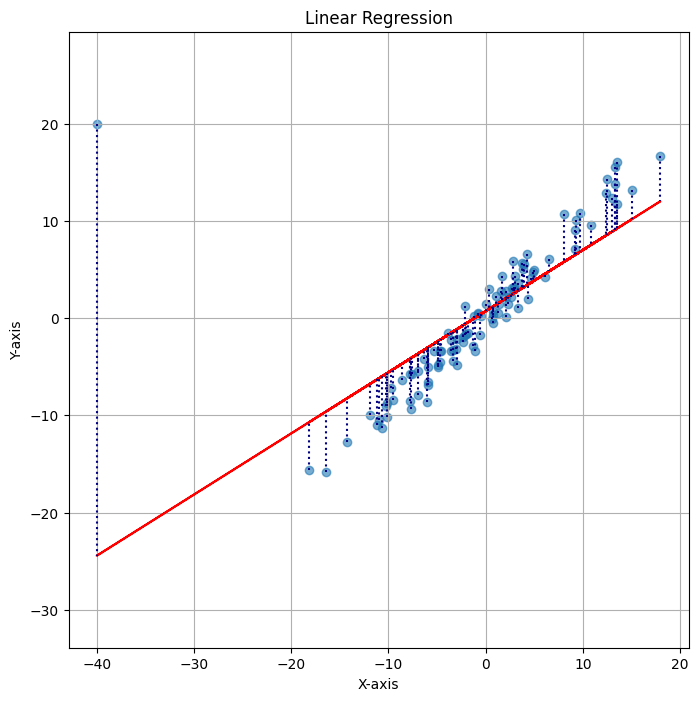

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.6)
yhat = w[0] * x + w[1] #fitted value with optimal parameters
plt.plot(x, yhat, color='red')
plt.axis('equal')

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], yhat[i]], color='navy', linestyle='dotted')

# Add titles and labels
plt.title('Linear Regression')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')


# Show the plot
plt.grid()
plt.show()


The line does not fit very well anymore, it is heavily influenced by the presence of one outlier. We need robust linear regression.

alpha too small, stopping.
[0.5280498  0.64387641]


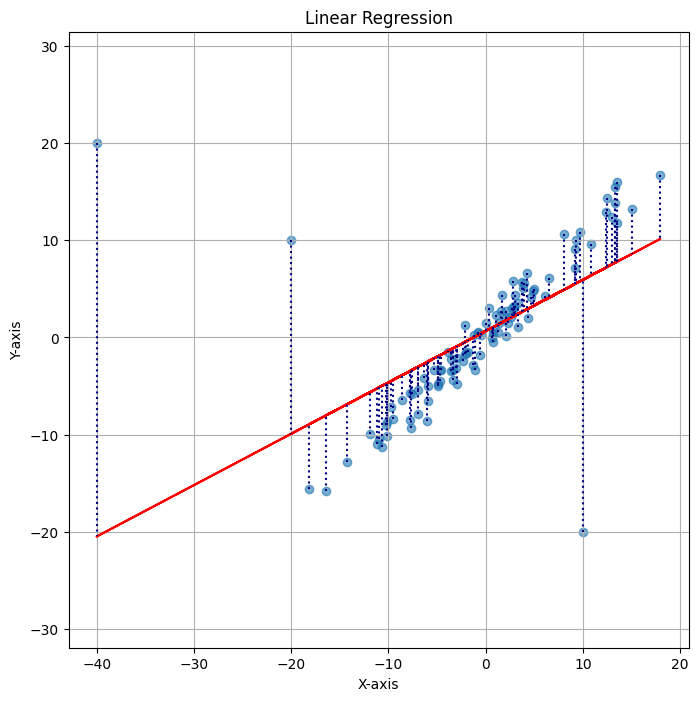

In [ ]:
points[2] = [10, -20]
points[3] = [-20, 10]

x = points[:, 0]
y = points[:, 1]

#w = np.random.rand(2) #initial guess
w = np.array([1,1])

w, path = backtracking_gradient_descent(w, f=Q, grad_f=grad_Q)
print(w)

plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.6)
yhat = w[0] * x + w[1] #fitted value with optimal parameters
plt.plot(x, yhat, color='red')
plt.axis('equal')

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], yhat[i]], color='navy', linestyle='dotted')

# Add titles and labels
plt.title('Linear Regression')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')


# Show the plot
plt.grid()
plt.show()


As we can see, adding more outliers distorts even more the regression line.

# Robust functions


In [ ]:
import math
import random

import matplotlib.pyplot as plt
import numpy as np


In [ ]:

# Given function to generate a set of n random points
def generate_random_points(m=[0., 0.], angle=45., lamb=np.array([[100,0],[0,1]]), n=100, n_outliers=0, seed=42):
  if n_outliers > n:
    raise ValueError("The number of outliers must be less than the number of points")

  random.seed(seed)
  np.random.seed(seed)
  angle = angle*math.pi/180
  rot = np.array([[math.cos(angle), -math.sin(angle)],
   [math.sin(angle), math.cos(angle)]])
  s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
  data = np.random.multivariate_normal(m, s, n)
  outlier_indices = np.zeros(len(data))


  if n_outliers == 0:
    return data, outlier_indices

  if n_outliers == 1:
    data[0] = np.array([-40, 20])
    outlier_indices[0] = 1
    return data, outlier_indices

  if n_outliers > 1:
    data[0] = np.array([-40, 20])
    outlier_indices[0] = 1

    data_max = data.max()
    data_min = data.min()
    for _ in range(n_outliers-1):
      data = np.vstack([data, np.array([1.5*random.uniform(data_min, data_max), 1.5*random.uniform(data_min, data_max)])])
      outlier_indices = np.append(outlier_indices, 1)

    return data, outlier_indices

  return data, outlier_indices



#### (1) Plot the LSM function, $\rho(u) = \frac{1}{2} u^2$, and the Cauchy function for $u \in [-10, 10]$.

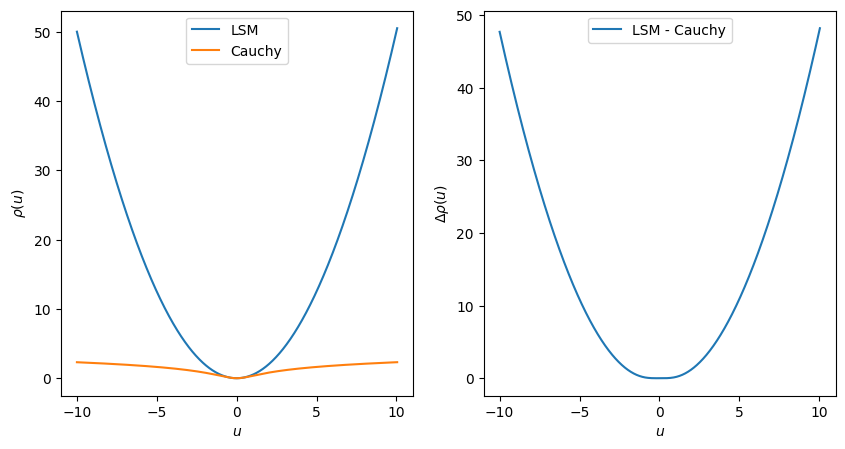

In [ ]:
def lsm(u):
  return .5 * pow(u, 2.)

def cauchy(u, c=1):
  return .5*pow(c, 2.)*np.log(1+pow(u/c, 2.))



# Plot the LSM and Cauchy functions in [-10, 10]
# Plot the difference between LSM and Cauchy in [-10, 10]
x_range = np.linspace(-10, 10.05, num=1000)

target_functions = [lsm, cauchy]
target_function_names = ["LSM", "Cauchy"]

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, target_function in enumerate(target_functions):
  ax1.plot(x_range, target_function(x_range), label=target_function_names[i])

ax1.legend(loc="best")
ax1.set_xlabel(r"$u$")
ax1.set_ylabel(r"$\rho(u)$")

ax2.plot(x_range, lsm(x_range) - cauchy(x_range), label="LSM - Cauchy")
ax2.legend(loc="best")
ax2.set_xlabel(r"$u$")
ax2.set_ylabel(r"$\Delta \rho(u)$")

plt.show()



#### (2) Implement the algorithm that allows to compute the parameters $w_0$ and $w_1$ using the Cauchy function. For that issue you can use the backtracking gradient descent method (there is no need to use the Newton method).

The following class implements a linear model and allows to fit it using either LSM or Cauchy, and performing optimization by using either backtracking gradient descent or a combined Newton-gradient method (we have implemented it just for testing purposes).

In [ ]:
# Define the linear model and its methods
class LinearModel():
  def __init__(self, w=None):
    if w is None:
      np.random.seed(42)
      self.w = np.array([np.random.randint(1, 5), np.random.randint(1, 5)])
    else:
      self.w = np.array(w)

  def predict(self, x, wp=None):
    if wp is None:
      wp = self.w

    return wp[0]*x + wp[1]

  def absolute_error(self, x, y_true, wp):
    y_pred = self.predict(x, wp)
    return np.abs(y_pred - y_true)

  def least_squares_method(self, x, y_true, wp=None):
    return np.sum(lsm(self.absolute_error(x, y_true, wp)))

  def cauchy_method(self, x, y_true, c=1, wp=None):
    return np.sum(cauchy(self.absolute_error(x, y_true, wp), c))

  def grad_cauchy_method(self, x, y_true, c=1, wp=None):
    grad0 = .5*pow(c, 2.) * np.sum((2.*x*(self.predict(x, wp) - y_true)/c) / (1 + pow((self.predict(x, wp) - y_true)/c, 2.)))
    grad1 = .5*pow(c, 2.) * np.sum((2.*(self.predict(x, wp) - y_true)/c) / (1 + pow((self.predict(x, wp) - y_true)/c, 2.)))
    return np.array([grad0, grad1])

  def grad_least_squares_method(self, x, y_true, wp=None):
    grad0 = np.sum(x*(self.predict(x, wp) - y_true))
    grad1 = np.sum((self.predict(x, wp) - y_true))
    return np.array([grad0, grad1])

  def hess_cauchy_method(self, x, y_true, c=1, wp=None):
    hess00 = -2.*pow(c, 2.) * np.sum((pow(x, 2.)*(self.predict(x, wp) - y_true - c)*(self.predict(x, wp) - y_true + c))/pow(pow(self.predict(x, wp) - y_true, 2.) + pow(c, 2.), 2.))
    hess01 = -2.*pow(c, 2.) * np.sum((x*(self.predict(x, wp) - y_true - c)*(self.predict(x, wp) - y_true + c))/pow(pow(self.predict(x, wp) - y_true, 2.) + pow(c, 2.), 2.))
    hess11 = -2.*pow(c, 2.) * np.sum((self.predict(x, wp) - y_true - c)*(self.predict(x, wp) - y_true + c)/pow(pow(self.predict(x, wp) - y_true, 2.) + pow(c, 2.), 2.))

    return np.array([[hess00, hess01], [hess01, hess11]])

  def hess_least_squares_method(self, x, y_true, wp=None):
    hess00 = np.sum(pow(x, 2.))
    hess01 = 0.
    hess11 = np.sum(np.ones(x.shape))

    return np.array([[hess00, hess01], [hess01, hess11]])

  def fit_cauchy(self, x, y_true, c=1., optimizer="backtracking_grad", alpha_0=1., max_iters=10000, z_tol=1.e-6):
    match optimizer:
      case "backtracking_grad":
        w_minimizer, w_path = self.backtracking_gradient_descent(x, y_true,
                                                                 self.cauchy_method, self.grad_cauchy_method,
                                                                 c=c, alpha_0=1., max_iters=10000, z_tol=1.e-6)
      case "newton":
        w_minimizer, w_path = self.newton_descent(x, y_true,
                                                  self.cauchy_method, self.grad_cauchy_method, self.hess_cauchy_method,
                                                  c=c, alpha_0=1., max_iters=10000, z_tol=1.e-6)
      case _:
        raise ValueError(f"Unknown optimizer: {optimizer}")

    self.w = w_minimizer

    return w_minimizer, w_path

  def fit_lsm(self, x, y_true, optimizer="backtracking_grad", alpha_0=1., max_iters=10000, z_tol=1.e-6):
    match optimizer:
      case "backtracking_grad":
        w_minimizer, w_path = self.backtracking_gradient_descent(x, y_true,
                                                                 self.least_squares_method, self.grad_least_squares_method,
                                                                 alpha_0=1., max_iters=10000, z_tol=1.e-6)
      case "newton":
        w_minimizer, w_path = self.newton_descent(x, y_true,
                                                  self.least_squares_method, self.grad_least_squares_method, self.hess_least_squares_method,
                                                  alpha_0=1., max_iters=10000, z_tol=1.e-6)
      case _:
        raise ValueError(f"Unknown optimizer: {optimizer}")

    self.w = w_minimizer

    return w_minimizer, w_path

  def backtracking_gradient_descent(self, x, y_true, error_f, grad_error_f, c=None, alpha_0=1., z_tol=1e-6, max_iters=10000):
    kwargs = {}
    if c is not None:
      kwargs["c"] = c

    w = self.w
    w_path = np.array([w])

    n_iters_conv = 0
    converged = np.linalg.norm(grad_error_f(x, y_true, wp=w, **kwargs)) < z_tol
    while not converged:
      alpha = alpha_0

      n_iters_back = 0

      wp = w - alpha*grad_error_f(x, y_true, wp=w, **kwargs)
      f_decreased = error_f(x, y_true, wp=wp, **kwargs) < error_f(x, y_true, wp=w, **kwargs)
      while not f_decreased:
        alpha /= 2
        wp = w - alpha*grad_error_f(x, y_true, wp=w, **kwargs)
        f_decreased = error_f(x, y_true, wp=wp, **kwargs) < error_f(x, y_true, wp=w, **kwargs)

        n_iters_back += 1

        if n_iters_back > max_iters or np.abs(alpha) < z_tol:
          print(f"{error_f.__name__}: Maximum number of iterations reached. No step could be computed.")
          n_iters_conv = max_iters
          break

      w = w - alpha*grad_error_f(x, y_true, wp=w, **kwargs)
      w_path = np.append(w_path, [w], axis=0)

      converged = np.linalg.norm(grad_error_f(x, y_true, wp=w, **kwargs)) < z_tol

      n_iters_conv += 1

      if n_iters_conv >= max_iters:
        print(f"{error_f.__name__}: Maximum number of iterations reached. No minimum could be reached.")
        break

    return w, w_path

  def newton_descent(self, x, y_true, error_f, grad_error_f, hess_error_f, c=None, alpha_0=1., z_tol=1e-6, max_iters=10000):
    kwargs = {}
    if c is not None:
      kwargs["c"] = c

    w = self.w
    w_path = np.array([w])

    n_iters_conv = 0
    converged = False
    while not converged:
      alpha = alpha_0
      d_k = np.linalg.solve(hess_error_f(x, y_true, wp=w, **kwargs), -grad_error_f(x, y_true, wp=w, **kwargs))
      eigs, _ = np.linalg.eig(hess_error_f(x, y_true, wp=w, **kwargs))

      n_iters_back = 0

      if np.all(eigs > 0):
        wp = w + alpha * d_k
        f_decreased = error_f(x, y_true, wp=wp, **kwargs) < error_f(x, y_true, wp=w, **kwargs)
        while not f_decreased:
          alpha /= 2
          wp = w + alpha * d_k
          f_decreased = error_f(x, y_true, wp=wp, **kwargs) < error_f(x, y_true, wp=w, **kwargs)

          n_iters_back += 1

          if n_iters_back > max_iters or np.abs(alpha) < z_tol:
            print(f"{error_f.__name__}: Maximum number of iterations reached. No step could be computed.")
            break

        w = w + alpha * d_k
        w_path = np.append(w_path, [w], axis=0)

      else:
        wp = w - alpha*grad_error_f(x, y_true, wp=w, **kwargs)
        f_decreased = error_f(x, y_true, wp=wp, **kwargs) < error_f(x, y_true, wp=w, **kwargs)
        while not f_decreased:
          alpha /= 2
          wp = w - alpha*grad_error_f(x, y_true, wp=w, **kwargs)
          f_decreased = error_f(x, y_true, wp=wp, **kwargs) < error_f(x, y_true, wp=w, **kwargs)

          n_iters_back += 1

          if n_iters_back > max_iters or np.abs(alpha) < z_tol:
            print(f"{error_f.__name__}: Maximum number of iterations reached. No step could be computed.")
            break

        w = w - alpha*grad_error_f(x, y_true, wp=w, **kwargs)
        w_path = np.append(w_path, [w], axis=0)

      converged = np.linalg.norm(grad_error_f(x, y_true, wp=w, **kwargs)) < z_tol

      n_iters_conv += 1

      if n_iters_conv >= max_iters:
        print(f"{error_f.__name__}: Maximum number of iterations reached. No minimum could be reached.")
        print(f"N = {n_iters_conv}")
        break

    return w, w_path

  def fit(self, x, y_true, error_function="cauchy", c=None, optimizer="backtracking_grad", alpha_0=1., max_iters=10000, z_tol=1.e-6):
    match error_function:
      case "cauchy":
        return self.fit_cauchy(x, y_true, c=c, optimizer=optimizer, alpha_0=alpha_0, max_iters=max_iters, z_tol=z_tol)
      case "lsm":
        return self.fit_lsm(x, y_true, optimizer=optimizer, alpha_0=alpha_0, max_iters=max_iters, z_tol=z_tol)
      case _:
        raise ValueError(f"Unknown error function: {error_function}")



The following code cell fits a linear model to a sample dataset with no outliers.


cauchy_method: Maximum number of iterations reached. No step could be computed.
cauchy_method: Maximum number of iterations reached. No minimum could be reached.


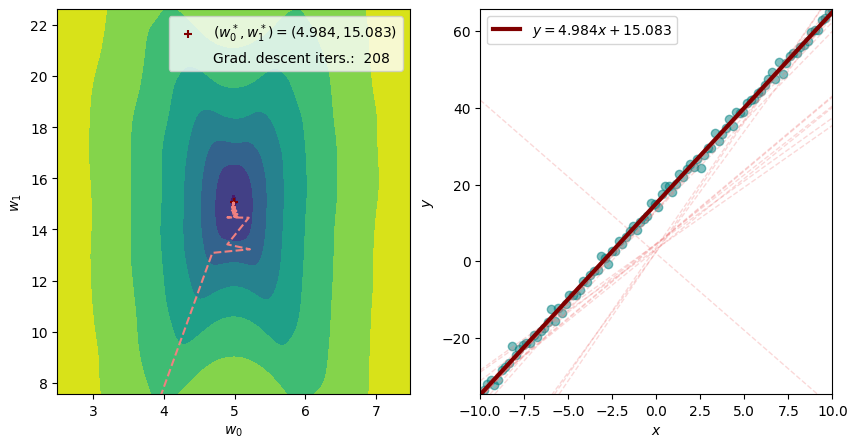

In [ ]:
# Create our dataset
dataset, _ = generate_random_points()
x = dataset[:, 0]
y_true = dataset[:, 1]

# -----------------------------------------------
# Just for test-fun purposes
x = np.linspace(-10, 10, num=100)
y_true = 5.*x + 15 + np.random.normal(0., 1, 100)
# -----------------------------------------------

# Instantiate our linear model class
model = LinearModel(w=[-4., 2.])

# Fit the model
error_function = "cauchy"
w_minimizer, w_path = model.fit(x, y_true, error_function=error_function)
n_desc_iters = len(w_path)-1

# Prepare a contour plot of the error function
center = w_minimizer[0]
width = w_minimizer[0]
w0_range = np.linspace(center-.5*width,
                       center+.5*width,
                       100)

center = w_minimizer[1]
width = w_minimizer[1]
w1_range = np.linspace(center-.5*width,
                       center+.5*width,
                       100)

z = np.zeros((len(w0_range), len(w1_range)))

for i, ww1 in enumerate(w0_range):
  for j, ww2 in enumerate(w1_range):
    match error_function:
      case "cauchy":
        z[j, i] = model.cauchy_method(x, y_true, wp=[ww1, ww2])
      case "lsm":
        z[j, i] = model.least_squares_method(x, y_true, wp=[ww1, ww2])

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

best_weights = rf"$(w_0^*, w_1^*) = ({w_minimizer[0]: .3f}, {w_minimizer[1]: .3f})$"

ax1.contourf(w0_range, w1_range, z, cmap="viridis")

ax1.plot(w_path[:, 0], w_path[:, 1], color="lightcoral", ls="--")
ax1.scatter(w_minimizer[0], w_minimizer[1], color='maroon', marker='+', label=best_weights)
ax1.plot([], [], ' ', label=rf"Grad. descent iters.: {n_desc_iters: d}")

ax1.set_xlim(w0_range.min(), w0_range.max())
ax1.set_ylim(w1_range.min(), w1_range.max())

ax1.set_xlabel(r"$w_0$")
ax1.set_ylabel(r"$w_1$")
ax1.legend(loc="best")


# Prepare a scatter plot of the data and fit curve
x_test = np.linspace(x.min(), x.max(), 100)
y_pred = model.predict(x_test)

for w in w_path[:-1]:
  w_model = LinearModel(w)
  w_pred = w_model.predict(x_test)
  ax2.plot(x_test, w_pred, color="lightcoral", alpha=0.3, lw=1, ls='--')

fit_equation = rf"$y = {w_minimizer[0]: .3f} x + {w_minimizer[1]: .3f}$"

ax2.scatter(x, y_true, color="teal", alpha=0.5)
ax2.plot(x_test, y_pred, color="maroon", lw=3, label=fit_equation)

ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y_true.min(), y_true.max())

ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")

ax2.legend(loc="best")

plt.show()


#### (3) Compare the results obtained with the least squares function and with the Cauchy function, assuming that there are no outliers in the dataset.

The following code cell perfoms a comparison between the LSM and the Cauchy function with the randomly generated dataset given in the assignment

least_squares_method: Maximum number of iterations reached. No step could be computed.
least_squares_method: Maximum number of iterations reached. No minimum could be reached.
cauchy_method: Maximum number of iterations reached. No step could be computed.
cauchy_method: Maximum number of iterations reached. No minimum could be reached.


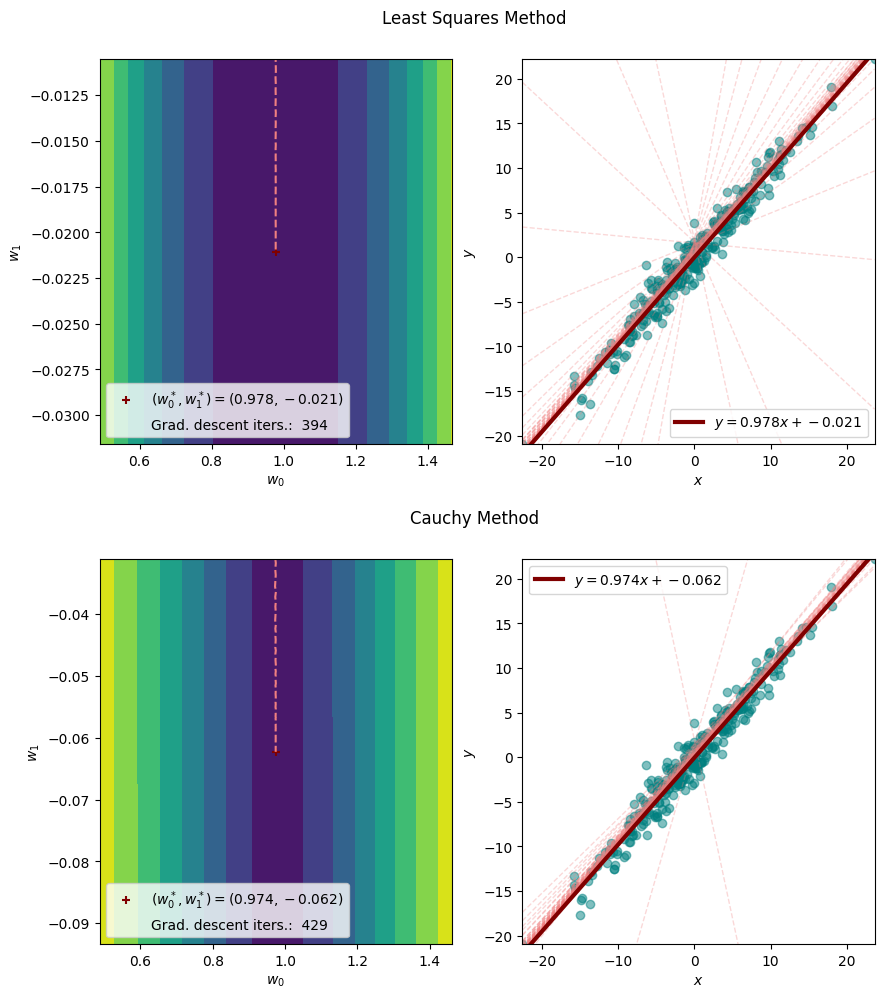

In [ ]:
# Create our dataset
dataset, _ = generate_random_points(seed=42, n=300)
x = dataset[:, 0]
y_true = dataset[:, 1]

error_functions = ["lsm", "cauchy"]

# Prepare matplotlib to make our plots
fig = plt.figure(figsize=(10, 10))
subfigs = fig.subfigures(nrows=2, ncols=1)
axes = []
for error_function, subfig in zip(error_functions, subfigs):
  match error_function:
    case "lsm":
      subfig.suptitle(f"Least Squares Method")
    case "cauchy":
      subfig.suptitle(f"Cauchy Method")
    case _:
      raise ValueError(f"Unknown error function: {error_function}")

  # create 1x3 subplots per subfig
  axes.append(subfig.subplots(nrows=1, ncols=2))

# Plot the model performance for each error function
for error_function, (axl, axr) in zip(error_functions, axes):
  # Instantiate our linear model class
  model = LinearModel(w=[-4., 2.])

  # Fit the model
  w_minimizer, w_path = model.fit(x, y_true, error_function=error_function)
  n_desc_iters = len(w_path)-1

  # Prepare a contour plot of the error function
  center = w_minimizer[0]
  width = w_minimizer[0]
  w0_range = np.linspace(center-.5*width,
                        center+.5*width,
                        100)

  center = w_minimizer[1]
  width = w_minimizer[1]
  w1_range = np.linspace(center-.5*width,
                        center+.5*width,
                        100)

  z = np.zeros((len(w0_range), len(w1_range)))

  for i, ww1 in enumerate(w0_range):
    for j, ww2 in enumerate(w1_range):
      match error_function:
        case "cauchy":
          z[j, i] = model.cauchy_method(x, y_true, wp=[ww1, ww2])
        case "lsm":
          z[j, i] = model.least_squares_method(x, y_true, wp=[ww1, ww2])

  best_weights = rf"$(w_0^*, w_1^*) = ({w_minimizer[0]: .3f}, {w_minimizer[1]: .3f})$"

  axl.contourf(w0_range, w1_range, z, cmap="viridis")

  axl.plot(w_path[:, 0], w_path[:, 1], color="lightcoral", ls="--")
  axl.scatter(w_minimizer[0], w_minimizer[1], color='maroon', marker='+', label=best_weights)
  axl.plot([], [], ' ', label=rf"Grad. descent iters.: {n_desc_iters: d}")

  axl.set_xlim(w0_range.min(), w0_range.max())
  axl.set_ylim(w1_range.min(), w1_range.max())

  axl.set_xlabel(r"$w_0$")
  axl.set_ylabel(r"$w_1$")
  axl.legend(loc="best")


  # Prepare a scatter plot of the data and fit curve
  x_test = np.linspace(x.min(), x.max(), 100)
  y_pred = model.predict(x_test)

  for w in w_path[:-1]:
    w_model = LinearModel(w)
    w_pred = w_model.predict(x_test)
    axr.plot(x_test, w_pred, color="lightcoral", alpha=0.3, lw=1, ls='--')

  fit_equation = rf"$y = {w[0]: .3f} x + {w[1]: .3f}$"

  axr.scatter(x, y_true, color="teal", alpha=0.5)
  axr.plot(x_test, y_pred, color="maroon", lw=3, label=fit_equation)

  axr.set_xlim(x.min(), x.max())
  axr.set_ylim(y_true.min(), y_true.max())

  axr.set_xlabel(r"$x$")
  axr.set_ylabel(r"$y$")

  axr.legend(loc="best")

plt.show()





Both methods converge to a line that fits closely the linear relationship that governs the sample points.

#### (4) Compare now the results with only one outlier. You may proceed as previously proposed. The Cauchy function should be more robust than the quadratic function.

The following code cell compares the performance between LSM and the Cauchy method when there is one outlier in the dataset.

least_squares_method: Maximum number of iterations reached. No step could be computed.
least_squares_method: Maximum number of iterations reached. No minimum could be reached.
cauchy_method: Maximum number of iterations reached. No step could be computed.
cauchy_method: Maximum number of iterations reached. No minimum could be reached.


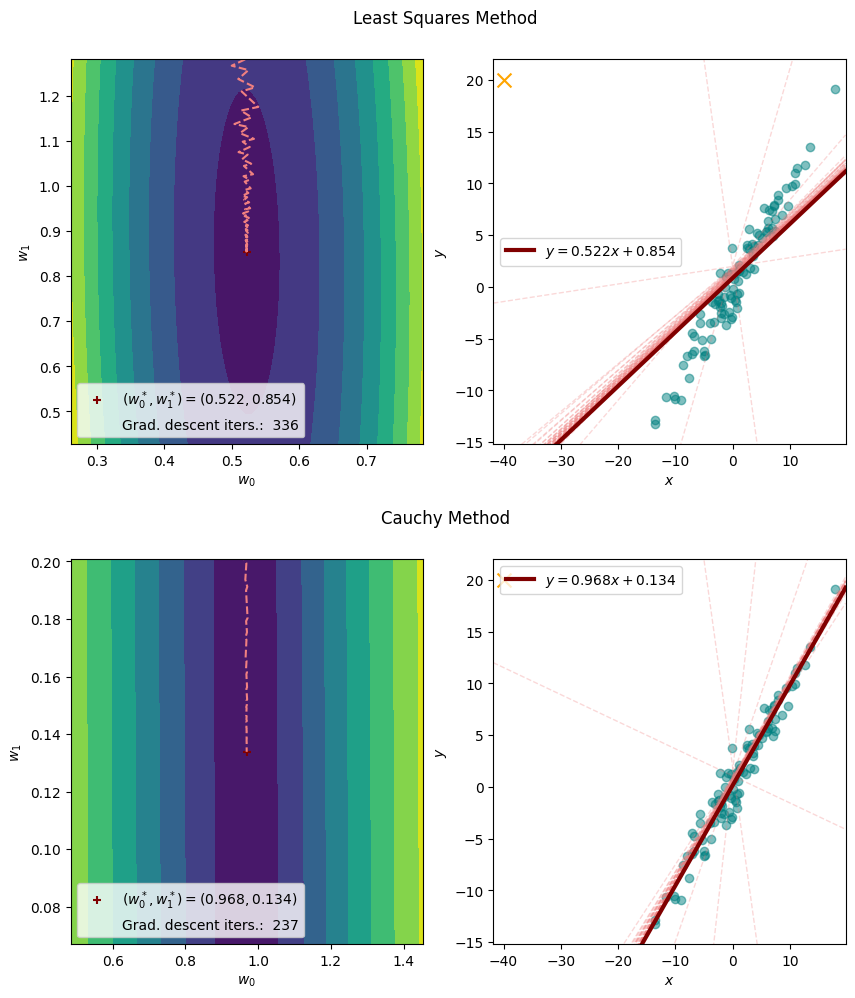

In [ ]:
# Create our dataset, add an outlier and shuffle
dataset, outlier_indices = generate_random_points(seed=42, n=100, n_outliers=1)

x = dataset[:, 0]
y_true = dataset[:, 1]

error_functions = ["lsm", "cauchy"]

# Prepare matplotlib to make our plots
fig = plt.figure(figsize=(10, 10))
subfigs = fig.subfigures(nrows=2, ncols=1)
axes = []
for error_function, subfig in zip(error_functions, subfigs):
  match error_function:
    case "lsm":
      subfig.suptitle(f"Least Squares Method")
    case "cauchy":
      subfig.suptitle(f"Cauchy Method")
    case _:
      raise ValueError(f"Unknown error function: {error_function}")

  # create 1x3 subplots per subfig
  axes.append(subfig.subplots(nrows=1, ncols=2))

# Plot the model performance for each error function
for error_function, (axl, axr) in zip(error_functions, axes):
  # Instantiate our linear model class
  model = LinearModel(w=[-4., 2.])

  # Fit the model
  w_minimizer, w_path = model.fit(x, y_true, error_function=error_function)
  n_desc_iters = len(w_path)-1

  # Prepare a contour plot of the error function
  center = w_minimizer[0]
  width = w_minimizer[0]
  w0_range = np.linspace(center-.5*width,
                        center+.5*width,
                        100)

  center = w_minimizer[1]
  width = w_minimizer[1]
  w1_range = np.linspace(center-.5*width,
                        center+.5*width,
                        100)

  z = np.zeros((len(w0_range), len(w1_range)))

  for i, ww1 in enumerate(w0_range):
    for j, ww2 in enumerate(w1_range):
      match error_function:
        case "cauchy":
          z[j, i] = model.cauchy_method(x, y_true, wp=[ww1, ww2])
        case "lsm":
          z[j, i] = model.least_squares_method(x, y_true, wp=[ww1, ww2])

  best_weights = rf"$(w_0^*, w_1^*) = ({w_minimizer[0]: .3f}, {w_minimizer[1]: .3f})$"

  axl.contourf(w0_range, w1_range, z, cmap="viridis")

  axl.plot(w_path[:, 0], w_path[:, 1], color="lightcoral", ls="--")
  axl.scatter(w_minimizer[0], w_minimizer[1], color='maroon', marker='+', label=best_weights)
  axl.plot([], [], ' ', label=rf"Grad. descent iters.: {n_desc_iters: d}")

  axl.set_xlim(w0_range.min(), w0_range.max())
  axl.set_ylim(w1_range.min(), w1_range.max())

  axl.set_xlabel(r"$w_0$")
  axl.set_ylabel(r"$w_1$")
  axl.legend(loc="best")


  # Prepare a scatter plot of the data and fit curve
  expansion_rate = .1
  x_test = np.linspace(x.min()-expansion_rate*np.abs(x.max()), x.max()+expansion_rate*np.abs(x.max()), 100)
  y_pred = model.predict(x_test)

  for w in w_path[:-1]:
    w_model = LinearModel(w)
    w_pred = w_model.predict(x_test)
    axr.plot(x_test, w_pred, color="lightcoral", alpha=0.3, lw=1, ls='--')

  fit_equation = rf"$y = {w[0]: .3f} x + {w[1]: .3f}$"

  axr.scatter(x[outlier_indices==0], y_true[outlier_indices==0], color="teal", alpha=0.5)
  axr.scatter(x[outlier_indices==1], y_true[outlier_indices==1], color="orange", marker='x', s=100, alpha=1)
  axr.plot(x_test, y_pred, color="maroon", lw=3, label=fit_equation)

  axr.set_xlim(x.min()-expansion_rate*np.abs(x.max()), x.max()+expansion_rate*np.abs(x.max()))
  axr.set_ylim(y_true.min()-expansion_rate*np.abs(y_true.max()), y_true.max()+expansion_rate*np.abs(y_true.max()))

  axr.set_xlabel(r"$x$")
  axr.set_ylabel(r"$y$")

  axr.legend(loc="best")

plt.show()


As we can see, the Cauchy function is significantly more robust to outliers than the least squares method. This is because of the fact that the Cauchy function has a bounded derivative and that it plateaus with $u\to\infty$. This makes it more robust to the presence of large errors $\left | y_i - \hat{y}_i \right |$ than the least squares method, which is heaviliy influenced by the presence of outliers

#### (5) Test the influence of the parameter $c$ in the parameters obtained. You may, for instance, check the results obtained with $c = 1$, $c = 100$, $c = 1/100$ and $c = 1/1000$. Can you reason why of these results? To this end, you are recommended to plot the histogram of the error function $\lvert u \rvert$ and to compare with the shape corresponding $\rho(u)$ functions. Consider performing a “zoom” of the Cauchy function to see the interval at which the function behaves as a quadratic function. Which values are considered as “inliers” / “outliers”?



cauchy_method: Maximum number of iterations reached. No step could be computed.
cauchy_method: Maximum number of iterations reached. No minimum could be reached.
cauchy_method: Maximum number of iterations reached. No step could be computed.
cauchy_method: Maximum number of iterations reached. No minimum could be reached.


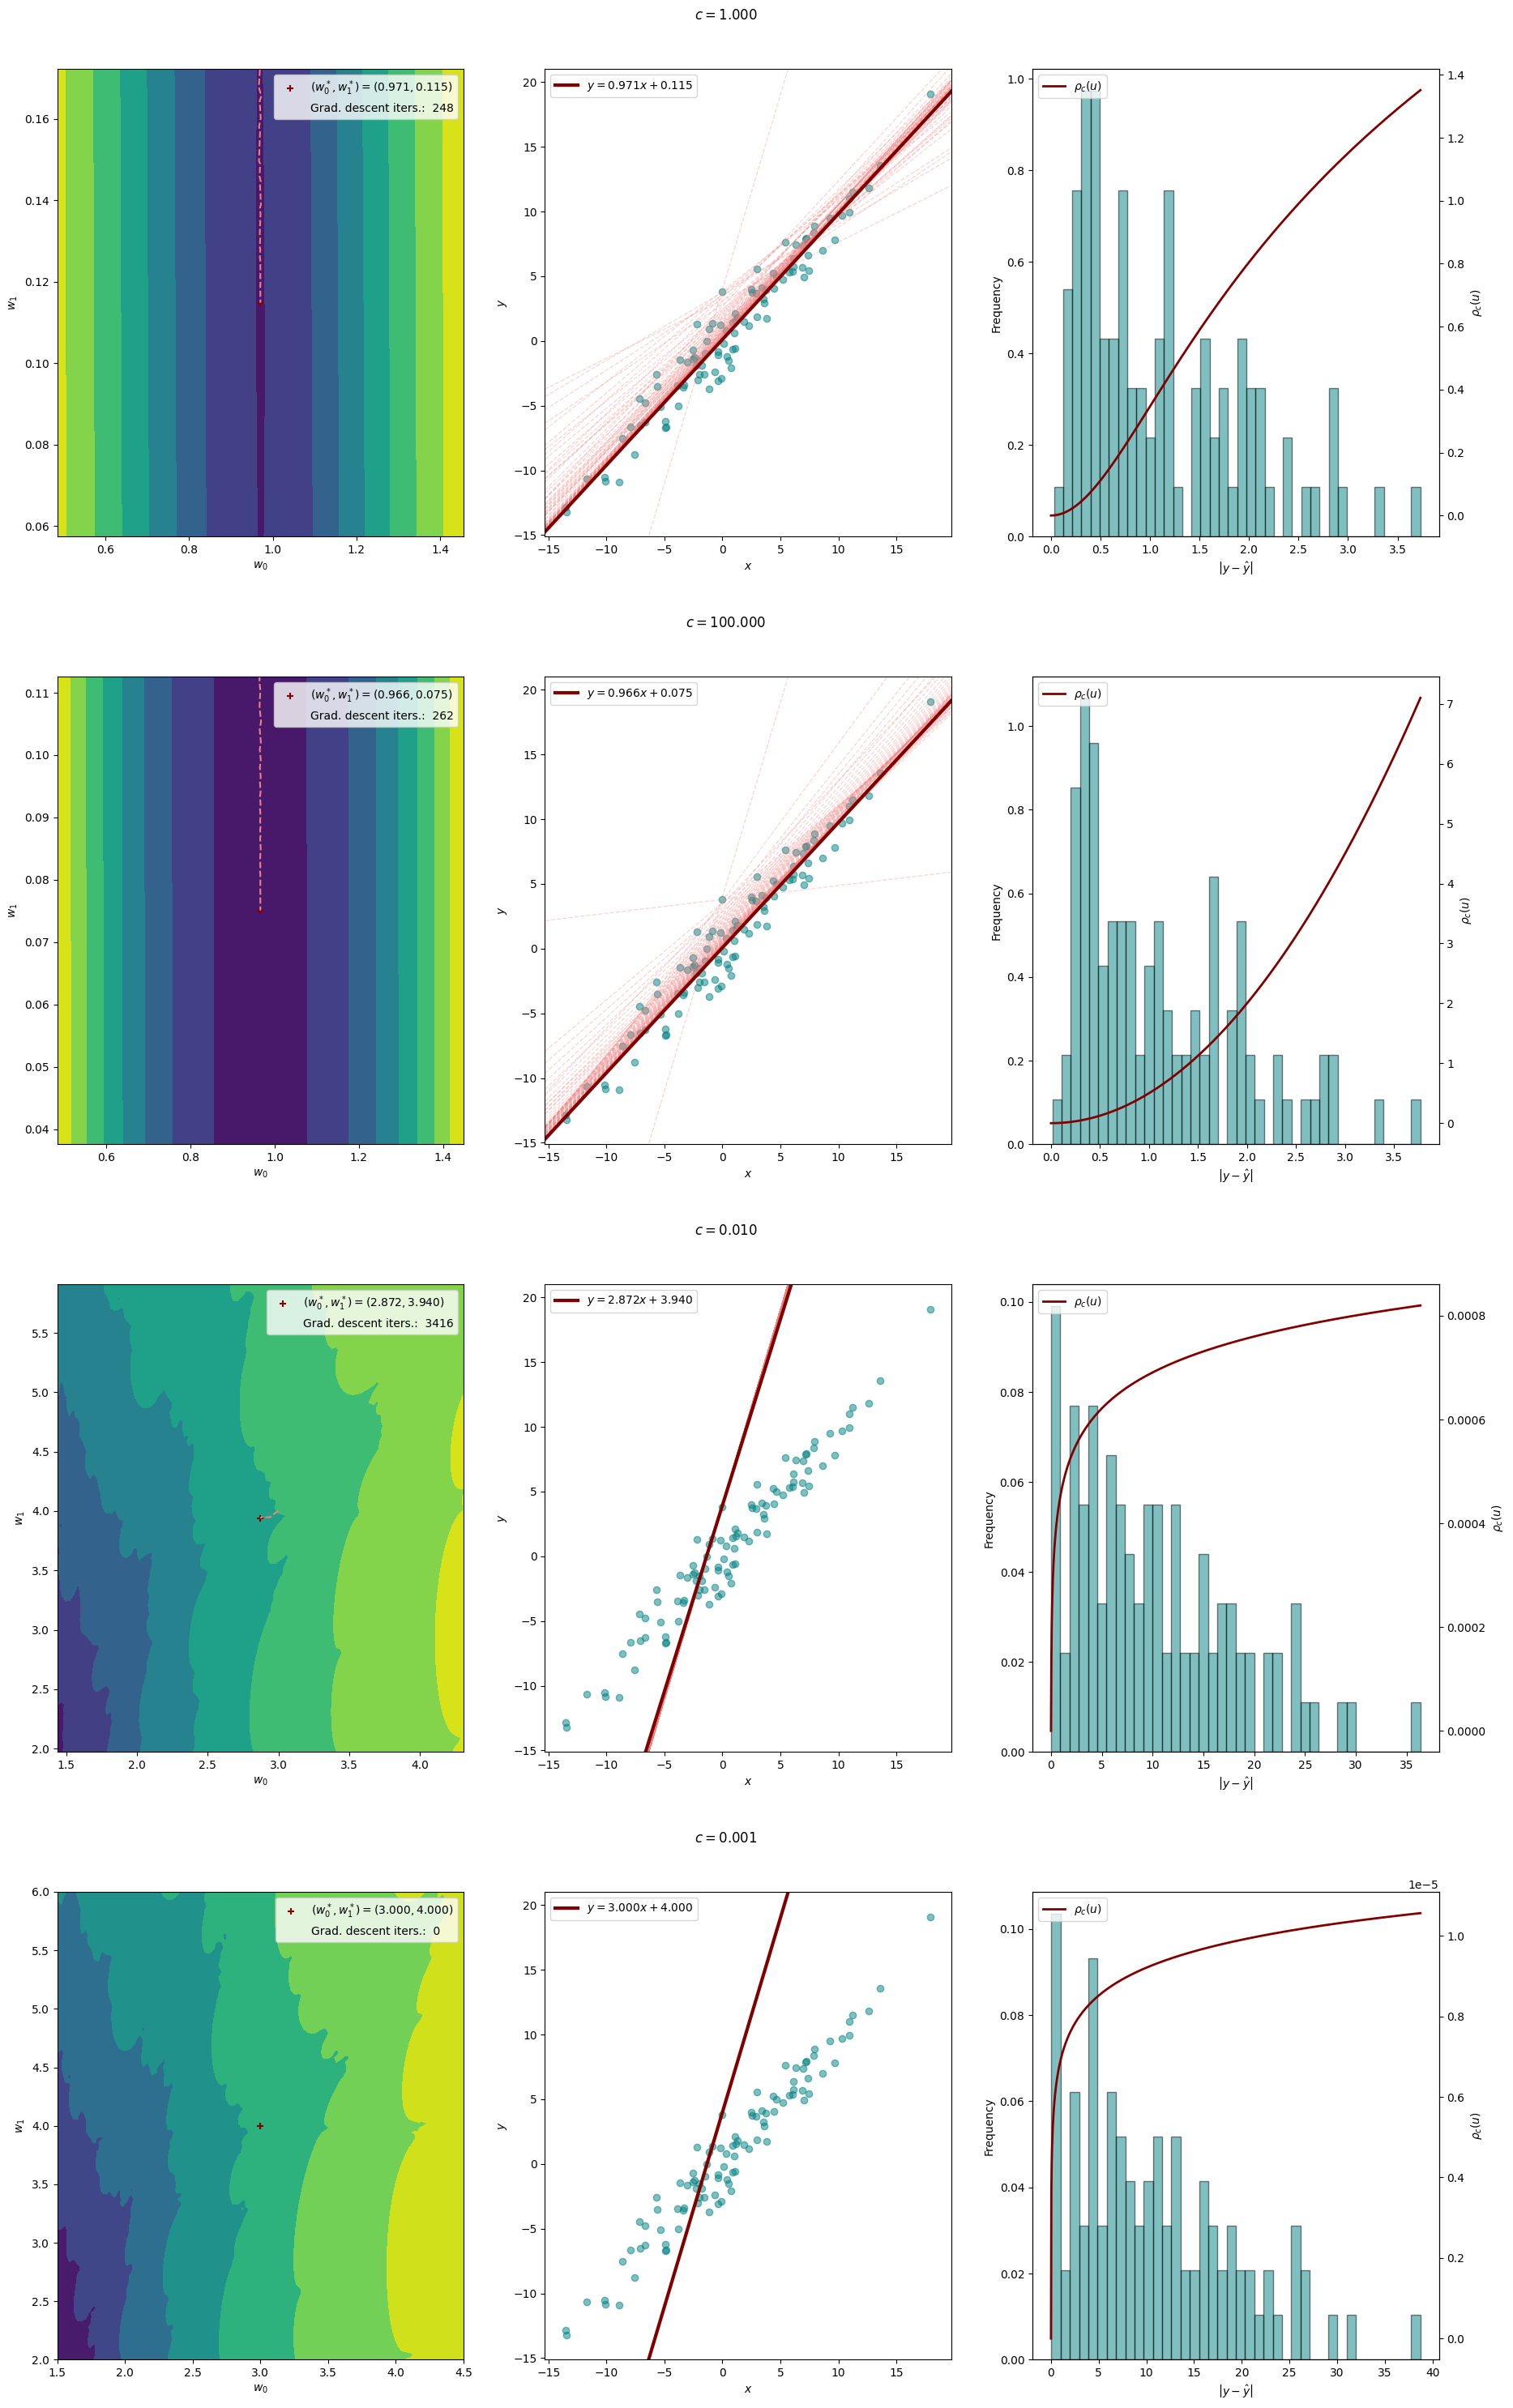

In [ ]:
# Create our dataset, add an outlier and shuffle
dataset, outlier_indices = generate_random_points(seed=42, n=100, n_outliers=0)

x = dataset[:, 0]
y_true = dataset[:, 1]

error_function = "cauchy"
cs = np.array([1., 100., 1./100., 1./1000.])

# Prepare matplotlib to make our plots
fig = plt.figure(figsize=(22, 30))
subfigs = fig.subfigures(nrows=len(cs), ncols=1)
axes = []
for c, subfig in zip(cs, subfigs):
  subfig.suptitle(rf"$c={c: .3f}$")
  # create 1x3 subplots per subfig
  axes.append(subfig.subplots(nrows=1, ncols=3))

# Plot the model performance for each error function
for c, (axl, axc, axr) in zip(cs, axes):
  # Instantiate our linear model class
  model = LinearModel()

  # Fit the model
  w_minimizer, w_path = model.fit(x, y_true, error_function=error_function, c=c, optimizer="backtracking_grad", alpha_0=1./c)
  n_desc_iters = len(w_path)-1

  # Prepare a contour plot of the error function
  center = w_minimizer[0]
  width = w_minimizer[0]
  w0_range = np.linspace(center-.5*width,
                        center+.5*width,
                        100)

  center = w_minimizer[1]
  width = w_minimizer[1]
  w1_range = np.linspace(center-.5*width,
                        center+.5*width,
                        100)

  z = np.zeros((len(w0_range), len(w1_range)))

  for i, ww1 in enumerate(w0_range):
    for j, ww2 in enumerate(w1_range):
      match error_function:
        case "cauchy":
          z[j, i] = model.cauchy_method(x, y_true, wp=[ww1, ww2], c=c)
        case "lsm":
          z[j, i] = model.least_squares_method(x, y_true, wp=[ww1, ww2])

  best_weights = rf"$(w_0^*, w_1^*) = ({w_minimizer[0]: .3f}, {w_minimizer[1]: .3f})$"

  axl.contourf(w0_range, w1_range, z, cmap="viridis")

  axl.plot(w_path[:, 0], w_path[:, 1], color="lightcoral", ls="--")
  axl.scatter(w_minimizer[0], w_minimizer[1], color='maroon', marker='+', label=best_weights)
  axl.plot([], [], " ", label=rf"Grad. descent iters.: {n_desc_iters: d}")

  axl.set_xlim(w0_range.min(), w0_range.max())
  axl.set_ylim(w1_range.min(), w1_range.max())

  axl.set_xlabel(r"$w_0$")
  axl.set_ylabel(r"$w_1$")
  axl.legend(loc="best")


  # Prepare a scatter plot of the data and fit curve
  expansion_rate = .1
  x_test = np.linspace(x.min()-expansion_rate*np.abs(x.max()), x.max()+expansion_rate*np.abs(x.max()), 100)
  y_pred = model.predict(x_test)

  for w in w_path[:-1]:
    w_model = LinearModel(w)
    w_pred = w_model.predict(x_test)
    axc.plot(x_test, w_pred, color="lightcoral", alpha=0.3, lw=1, ls="--")

  fit_equation = rf"$y = {w_minimizer[0]: .3f} x + {w_minimizer[1]: .3f}$"

  axc.scatter(x[outlier_indices==0], y_true[outlier_indices==0], color="teal", alpha=0.5)
  axc.scatter(x[outlier_indices==1], y_true[outlier_indices==1], color="orange", marker='x', s=100, alpha=1)
  axc.plot(x_test, y_pred, color="maroon", lw=3, label=fit_equation)

  axc.set_xlim(x.min()-expansion_rate*np.abs(x.max()), x.max()+expansion_rate*np.abs(x.max()))
  axc.set_ylim(y_true.min()-expansion_rate*np.abs(y_true.max()), y_true.max()+expansion_rate*np.abs(y_true.max()))

  axc.set_xlabel(r"$x$")
  axc.set_ylabel(r"$y$")

  axc.legend(loc="best")

  # Compute a histogram of the residuals and plot it
  residuals = model.absolute_error(x, y_true, w_minimizer)
  axr.hist(residuals, bins=40, density=True, color="teal", alpha=0.5, edgecolor="black")

  # Plot the error function over the histogram
  axr1 = axr.twinx()
  x_range = np.linspace(0, residuals.max(), 1000)
  axr1.plot(x_range, cauchy(x_range, c=c), color="maroon", lw=2, label=rf"$\rho_c(u)$")


  axr.set_xlabel(r"$\left|y - \hat{y}\right|$")
  axr.set_ylabel(r"Frequency")
  axr1.set_ylabel(r"$\rho_c(u)$")
  axr1.legend(loc="best")




The parameter $c$ controls the magintude of the values that are considered inliers or outliers. Notice that, for small values of $c$, the algorithm fails to fit correctly the data. This is because only a small proportion of values are considered inliers, and the rest of the data is considered outlier. Moreover, small values of $c$ make the tast of gradient descent more difficult, as the graph of the function becomes significantly flatter than for high values of $c$.

#### (6) The Cauchy function is not “perfect”, and it is not robust for any number of outliers. Using $c=1$ and $c = 1/100$ you may, as before, gradually introduce more number of outliers into the dataset. You should see that for a certain number of outliers, the the Cauchy function will be sensitive to the “high” number of outliers. Can you comment on the experiments you have performed?

cauchy_method: Maximum number of iterations reached. No step could be computed.
cauchy_method: Maximum number of iterations reached. No minimum could be reached.
cauchy_method: Maximum number of iterations reached. No step could be computed.
cauchy_method: Maximum number of iterations reached. No minimum could be reached.
cauchy_method: Maximum number of iterations reached. No step could be computed.
cauchy_method: Maximum number of iterations reached. No minimum could be reached.


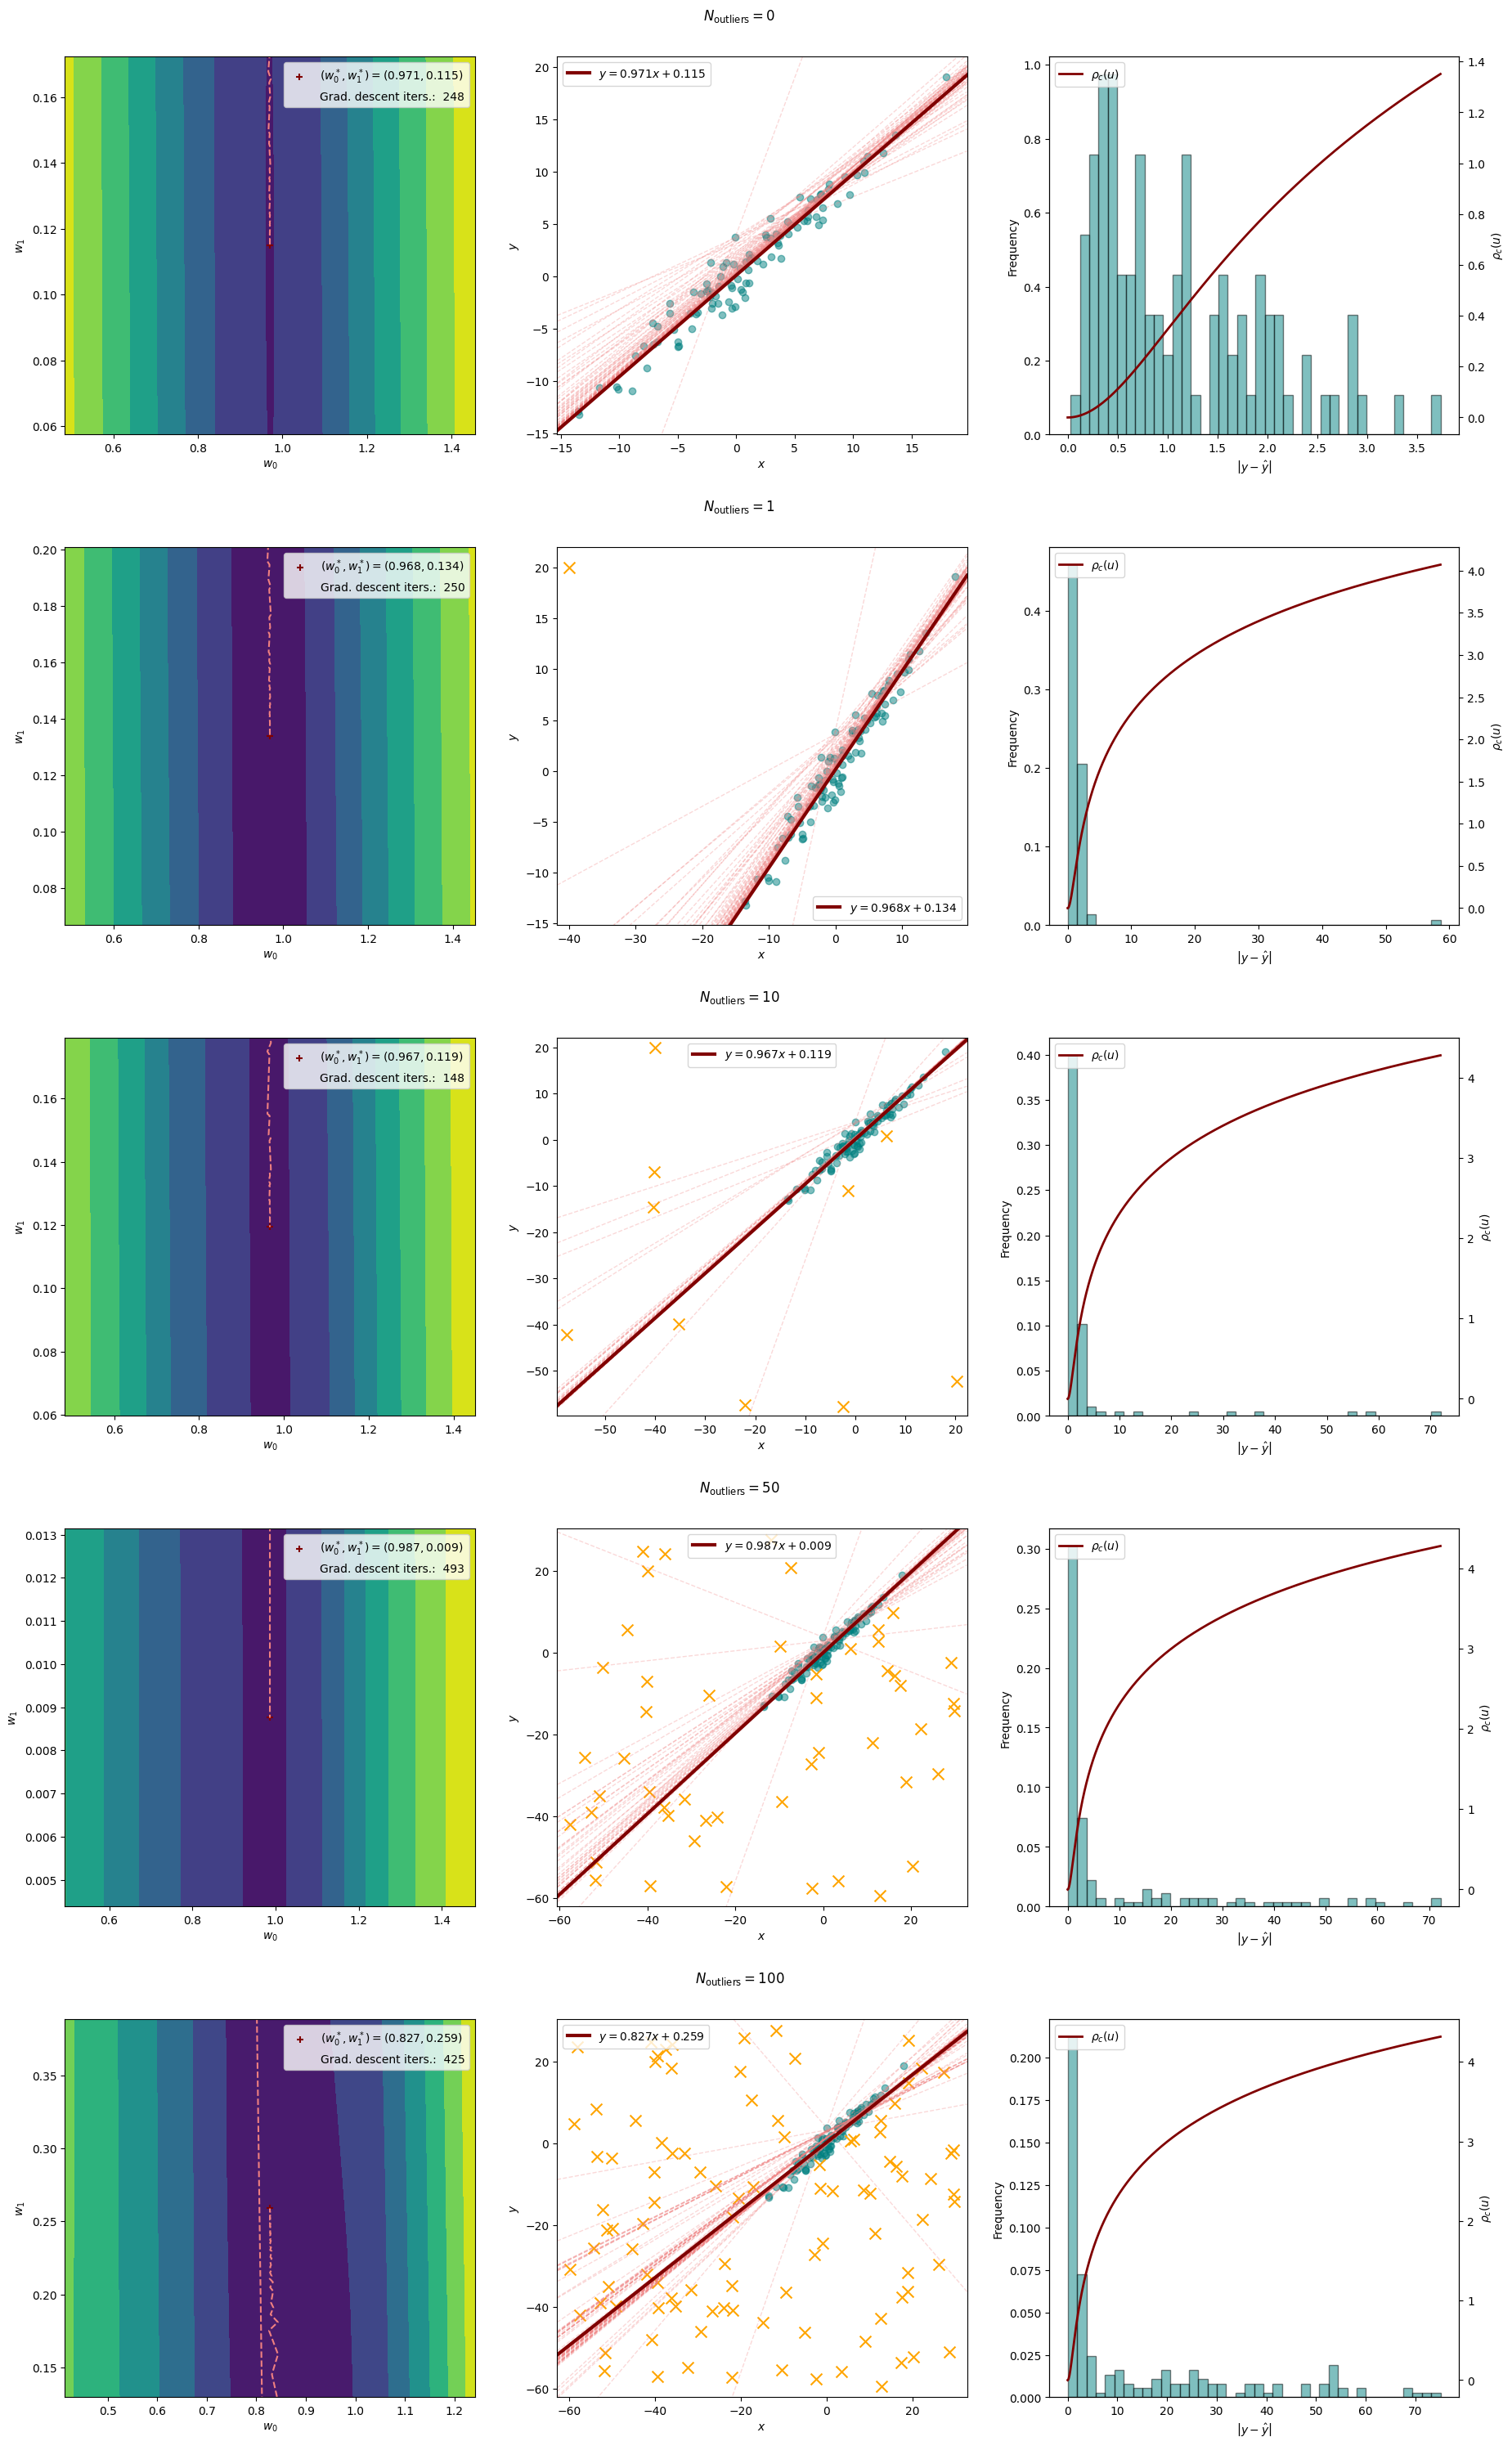

In [ ]:
# Control constants
ns_outliers = [0, 1, 10, 50, 100]
error_function = "cauchy"
c = 1.

# Prepare matplotlib to make our plots
fig = plt.figure(figsize=(22, 30))
subfigs = fig.subfigures(nrows=len(ns_outliers), ncols=1)
axes = []
for n_outliers, subfig in zip(ns_outliers, subfigs):
  subfig.suptitle(r"$N_\text{outliers} = $"+f"{n_outliers}")
  # create 1x3 subplots per subfig
  axes.append(subfig.subplots(nrows=1, ncols=3))

# Plot the model performance for each error function
for n_outliers, (axl, axc, axr) in zip(ns_outliers, axes):
  # Create a dataset with the desired number of outliers
  dataset, outlier_indices = generate_random_points(seed=42, n=100, n_outliers=n_outliers)
  x = dataset[:, 0]
  y_true = dataset[:, 1]

  # Instantiate our linear model class
  model = LinearModel()

  # Fit the model
  w_minimizer, w_path = model.fit(x, y_true, error_function=error_function, c=1., optimizer="backtracking_grad", alpha_0=1.)
  n_desc_iters = len(w_path)-1

  # Prepare a contour plot of the error function
  center = w_minimizer[0]
  width = w_minimizer[0]
  w0_range = np.linspace(center-.5*width,
                        center+.5*width,
                        100)

  center = w_minimizer[1]
  width = w_minimizer[1]
  w1_range = np.linspace(center-.5*width,
                        center+.5*width,
                        100)

  z = np.zeros((len(w0_range), len(w1_range)))

  for i, ww1 in enumerate(w0_range):
    for j, ww2 in enumerate(w1_range):
      match error_function:
        case "cauchy":
          z[j, i] = model.cauchy_method(x, y_true, wp=[ww1, ww2], c=c)
        case "lsm":
          z[j, i] = model.least_squares_method(x, y_true, wp=[ww1, ww2])

  best_weights = rf"$(w_0^*, w_1^*) = ({w_minimizer[0]: .3f}, {w_minimizer[1]: .3f})$"

  axl.contourf(w0_range, w1_range, z, cmap="viridis")

  axl.plot(w_path[:, 0], w_path[:, 1], color="lightcoral", ls="--")
  axl.scatter(w_minimizer[0], w_minimizer[1], color='maroon', marker='+', label=best_weights)
  axl.plot([], [], " ", label=rf"Grad. descent iters.: {n_desc_iters: d}")

  axl.set_xlim(w0_range.min(), w0_range.max())
  axl.set_ylim(w1_range.min(), w1_range.max())

  axl.set_xlabel(r"$w_0$")
  axl.set_ylabel(r"$w_1$")
  axl.legend(loc="best")


  # Prepare a scatter plot of the data and fit curve
  expansion_rate = .1
  x_test = np.linspace(x.min()-expansion_rate*np.abs(x.max()), x.max()+expansion_rate*np.abs(x.max()), 100)
  y_pred = model.predict(x_test)

  for w in w_path[:-1]:
    w_model = LinearModel(w)
    w_pred = w_model.predict(x_test)
    axc.plot(x_test, w_pred, color="lightcoral", alpha=0.3, lw=1, ls="--")

  fit_equation = rf"$y = {w_minimizer[0]: .3f} x + {w_minimizer[1]: .3f}$"

  axc.scatter(x[outlier_indices==0], y_true[outlier_indices==0], color="teal", alpha=0.5)
  axc.scatter(x[outlier_indices==1], y_true[outlier_indices==1], color="orange", marker='x', s=100, alpha=1)
  axc.plot(x_test, y_pred, color="maroon", lw=3, label=fit_equation)

  axc.set_xlim(x.min()-expansion_rate*np.abs(x.max()), x.max()+expansion_rate*np.abs(x.max()))
  axc.set_ylim(y_true.min()-expansion_rate*np.abs(y_true.max()), y_true.max()+expansion_rate*np.abs(y_true.max()))

  axc.set_xlabel(r"$x$")
  axc.set_ylabel(r"$y$")

  axc.legend(loc="best")

  # Compute a histogram of the residuals and plot it
  residuals = model.absolute_error(x, y_true, w_minimizer)
  axr.hist(residuals, bins=40, density=True, color="teal", alpha=0.5, edgecolor="black")

  # Plot the error function over the histogram
  axr1 = axr.twinx()
  x_range = np.linspace(0, residuals.max(), 1000)
  axr1.plot(x_range, cauchy(x_range, c=1.), color="maroon", lw=2, label=rf"$\rho_c(u)$")

  axr.set_xlabel(r"$\left|y - \hat{y}\right|$")
  axr.set_ylabel(r"Frequency")
  axr1.set_ylabel(r"$\rho_c(u)$")
  axr1.legend(loc="best")




The plots above show the results for $c = 1$.

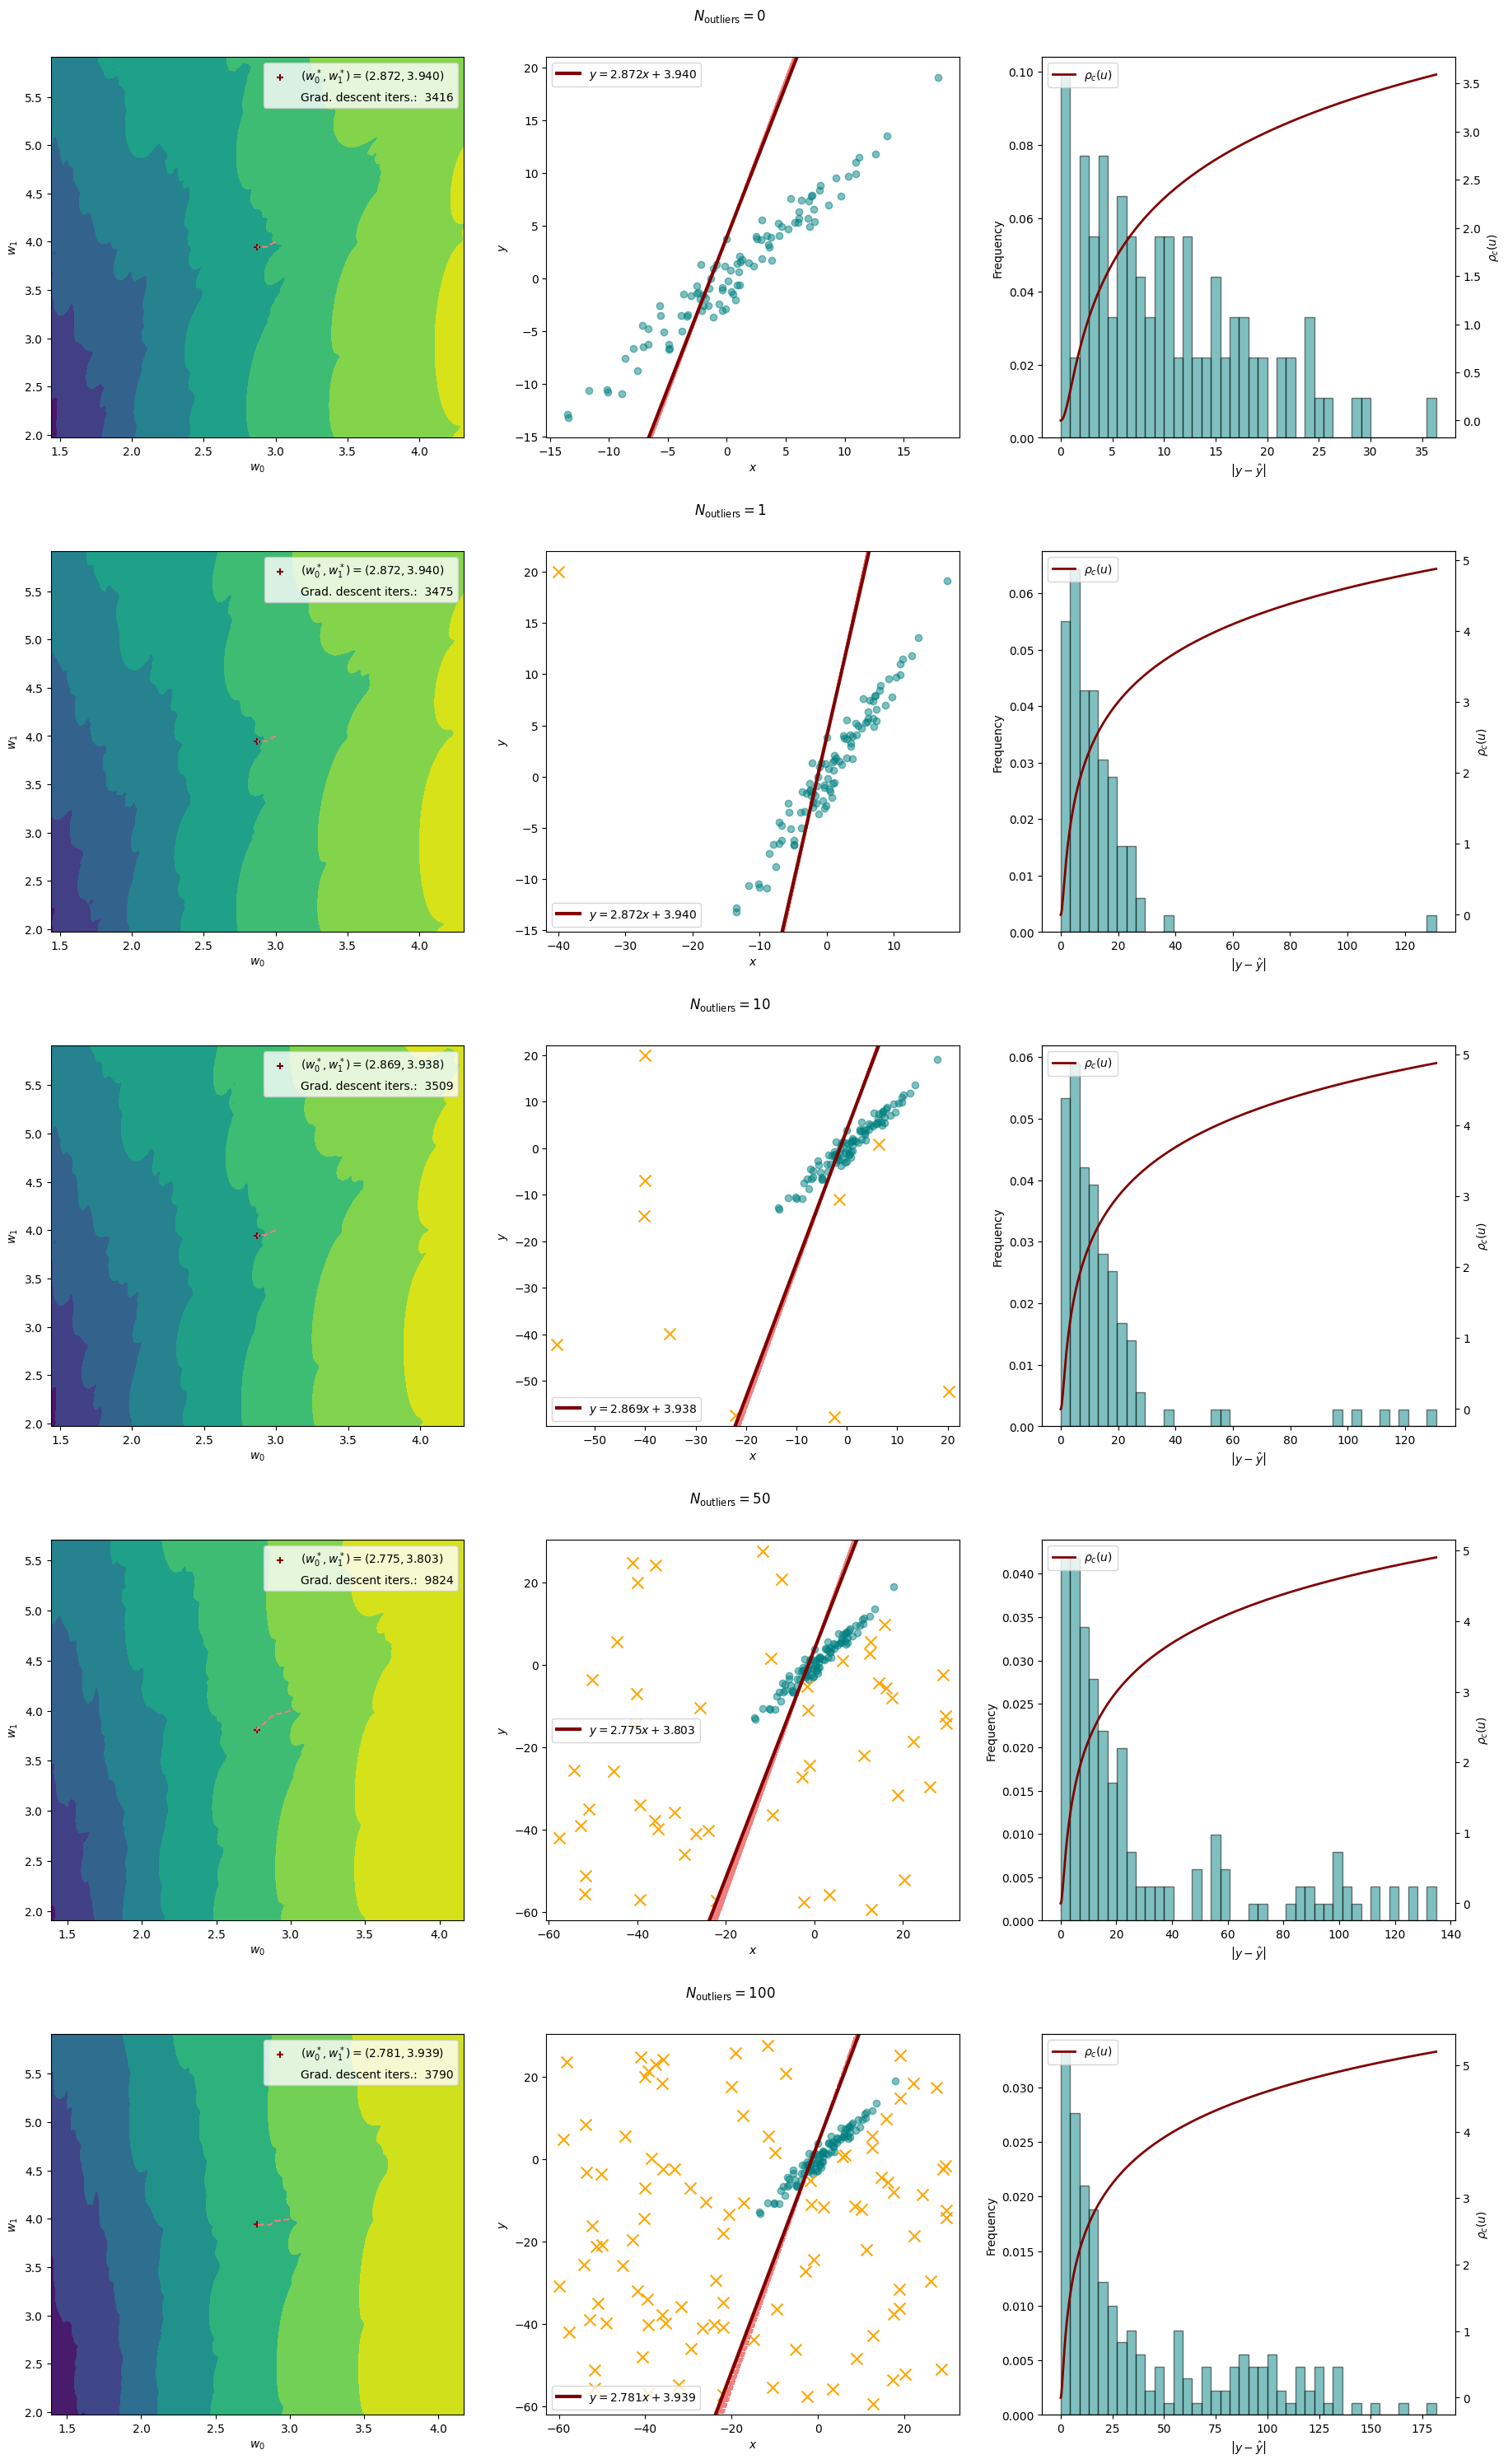

In [ ]:
# Control constants
ns_outliers = [0, 1, 10, 50, 100]
error_function = "cauchy"
c = 1.e-2

# Prepare matplotlib to make our plots
fig = plt.figure(figsize=(22, 30))
subfigs = fig.subfigures(nrows=len(ns_outliers), ncols=1)
axes = []
for n_outliers, subfig in zip(ns_outliers, subfigs):
  subfig.suptitle(r"$N_\text{outliers} = $"+f"{n_outliers}")
  # create 1x3 subplots per subfig
  axes.append(subfig.subplots(nrows=1, ncols=3))

# Plot the model performance for each error function
for n_outliers, (axl, axc, axr) in zip(ns_outliers, axes):
  # Create a dataset with the desired number of outliers
  dataset, outlier_indices = generate_random_points(seed=42, n=100, n_outliers=n_outliers)
  x = dataset[:, 0]
  y_true = dataset[:, 1]

  # Instantiate our linear model class
  model = LinearModel()

  # Fit the model
  w_minimizer, w_path = model.fit(x, y_true, error_function=error_function, c=1.e-2, optimizer="backtracking_grad", alpha_0=1.)
  n_desc_iters = len(w_path)-1

  # Prepare a contour plot of the error function
  center = w_minimizer[0]
  width = w_minimizer[0]
  w0_range = np.linspace(center-.5*width,
                        center+.5*width,
                        100)

  center = w_minimizer[1]
  width = w_minimizer[1]
  w1_range = np.linspace(center-.5*width,
                        center+.5*width,
                        100)

  z = np.zeros((len(w0_range), len(w1_range)))

  for i, ww1 in enumerate(w0_range):
    for j, ww2 in enumerate(w1_range):
      match error_function:
        case "cauchy":
          z[j, i] = model.cauchy_method(x, y_true, wp=[ww1, ww2], c=c)
        case "lsm":
          z[j, i] = model.least_squares_method(x, y_true, wp=[ww1, ww2])

  best_weights = rf"$(w_0^*, w_1^*) = ({w_minimizer[0]: .3f}, {w_minimizer[1]: .3f})$"

  axl.contourf(w0_range, w1_range, z, cmap="viridis")

  axl.plot(w_path[:, 0], w_path[:, 1], color="lightcoral", ls="--")
  axl.scatter(w_minimizer[0], w_minimizer[1], color='maroon', marker='+', label=best_weights)
  axl.plot([], [], " ", label=rf"Grad. descent iters.: {n_desc_iters: d}")

  axl.set_xlim(w0_range.min(), w0_range.max())
  axl.set_ylim(w1_range.min(), w1_range.max())

  axl.set_xlabel(r"$w_0$")
  axl.set_ylabel(r"$w_1$")
  axl.legend(loc="best")


  # Prepare a scatter plot of the data and fit curve
  expansion_rate = .1
  x_test = np.linspace(x.min()-expansion_rate*np.abs(x.max()), x.max()+expansion_rate*np.abs(x.max()), 100)
  y_pred = model.predict(x_test)

  for w in w_path[:-1]:
    w_model = LinearModel(w)
    w_pred = w_model.predict(x_test)
    axc.plot(x_test, w_pred, color="lightcoral", alpha=0.3, lw=1, ls="--")

  fit_equation = rf"$y = {w_minimizer[0]: .3f} x + {w_minimizer[1]: .3f}$"

  axc.scatter(x[outlier_indices==0], y_true[outlier_indices==0], color="teal", alpha=0.5)
  axc.scatter(x[outlier_indices==1], y_true[outlier_indices==1], color="orange", marker='x', s=100, alpha=1)
  axc.plot(x_test, y_pred, color="maroon", lw=3, label=fit_equation)

  axc.set_xlim(x.min()-expansion_rate*np.abs(x.max()), x.max()+expansion_rate*np.abs(x.max()))
  axc.set_ylim(y_true.min()-expansion_rate*np.abs(y_true.max()), y_true.max()+expansion_rate*np.abs(y_true.max()))

  axc.set_xlabel(r"$x$")
  axc.set_ylabel(r"$y$")

  axc.legend(loc="best")

  # Compute a histogram of the residuals and plot it
  residuals = model.absolute_error(x, y_true, w_minimizer)
  axr.hist(residuals, bins=40, density=True, color="teal", alpha=0.5, edgecolor="black")

  # Plot the error function over the histogram
  axr1 = axr.twinx()
  x_range = np.linspace(0, residuals.max(), 1000)
  axr1.plot(x_range, cauchy(x_range, c=1.), color="maroon", lw=2, label=rf"$\rho_c(u)$")

  axr.set_xlabel(r"$\left|y - \hat{y}\right|$")
  axr.set_ylabel(r"Frequency")
  axr1.set_ylabel(r"$\rho_c(u)$")
  axr1.legend(loc="best")




The plots above show the results for $c = 1/100$.

As we can see, for $c = 1$, the function keeps robust against outliers in the dataset until a certain point, beyond which the fit line fails to capture the lineal trend of the data. For $c = 1/100$, the algorithm can no longer fit the real data and gradient descent becomes unsustainable.